In [3]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests
import pprint as pp

def get_data(endpoint, params=None):
    base_url = "https://www.proteomicsdb.org/proteomicsdb/logic/api/"  # Replace with your actual base URL
    url = f"{base_url}{endpoint}"
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise an error for bad responses
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

# Function to get all peptide identifications for a given protein
def get_peptide_identifications(protein_filter):
    endpoint = f"proteinpeptideresult.xsodata/InputParams(PROTEINFILTER='{protein_filter}')/Results"
    params = {
        "$select": (
            "ENTRY_NAME,PROTEIN_NAME,UNIQUE_IDENTIFIER,TAXCODE,CHROMOSOME_NAME,GENE_NAME,STRAND,"
            "PEPTIDE_SEQUENCE,PEPTIDE_MASS,START_POSITION,END_POSITION,PEPTIDE_SCORE,PROTEIN_Q_VALUE,"
            "PEPTIDE_Q_VALUE,SEARCH_ENGINE,ISUNIQUE,ISUNIQUE_PROTEIN,PROJECT_NAME,PROJECT_DESCRIPTION,"
            "EXPERIMENT_NAME,EXPERIMENT_ID,EXPERIMENT_DESCRIPTION,PUBMEDID"
        ),
        "$format": "json"
    }
    return get_data(endpoint, params)

# Example usage
protein_filter = "Q92769"
experiment_data = get_peptide_identifications(protein_filter)
with open("experiment_data.json", "w") as file:
    pp.pprint(experiment_data, stream=file)


## Peptide Frequency Analysis

There are is a very wide range of most common peptides found in a given protein. After getting all identified proteins and their identified peptides per given experiment id, we can analyze the frequency of each peptide in the identified proteins. This is done by counting how many times each peptide appears in the list of identified proteins. The result is a dictionary where the keys are the peptides and the values are their frequencies.

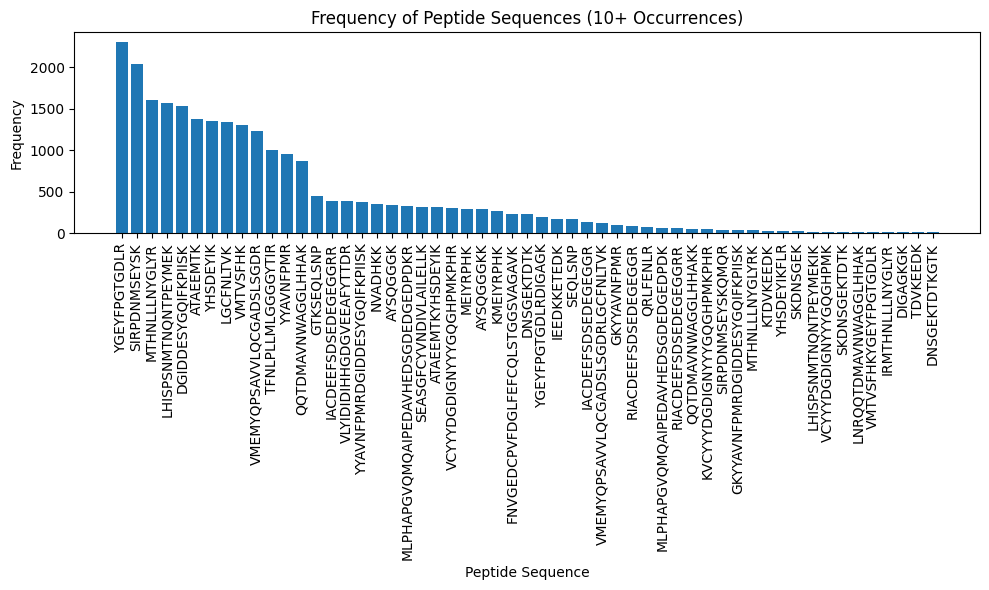

In [21]:
from collections import Counter

import matplotlib.pyplot as plt

# Count the frequency of each peptide sequence
peptide_freq = dict()

for result in experiment_data['d']['results']:
    sequence = result['PEPTIDE_SEQUENCE']
    if sequence in peptide_freq:
        peptide_freq[sequence] += 1
    else:
        peptide_freq[sequence] = 1

# Filter peptide sequences with 10+ occurrences
filtered_peptide_freq = {k: v for k, v in peptide_freq.items() if v > 10}
filtered_peptide_freq = dict(sorted(filtered_peptide_freq.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10, 6))
plt.bar(filtered_peptide_freq.keys(), filtered_peptide_freq.values())
plt.xlabel('Peptide Sequence')
plt.ylabel('Frequency')
plt.title('Frequency of Peptide Sequences (10+ Occurrences)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
